In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

In [2]:
filename='../data/sephora_website_dataset.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [4]:
df.shape

(9168, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
id                        9168 non-null int64
brand                     9168 non-null object
category                  9168 non-null object
name                      9168 non-null object
size                      9168 non-null object
rating                    9168 non-null float64
number_of_reviews         9168 non-null int64
love                      9168 non-null int64
price                     9168 non-null float64
value_price               9168 non-null float64
URL                       9168 non-null object
MarketingFlags            9168 non-null bool
MarketingFlags_content    9168 non-null object
options                   9168 non-null object
details                   9168 non-null object
how_to_use                9168 non-null object
ingredients               9168 non-null object
online_only               9168 non-null int64
exclusive                 9168 non-null int64
limi

In [6]:
df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [7]:
# check the index values
df.index.values

array([   0,    1,    2, ..., 9165, 9166, 9167], dtype=int64)

In [8]:
df.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [9]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.index

RangeIndex(start=0, stop=9168, step=1)

In [11]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [12]:
# check for null values
df.isnull().any()

id                        False
brand                     False
category                  False
name                      False
size                      False
rating                    False
number_of_reviews         False
love                      False
price                     False
value_price               False
URL                       False
MarketingFlags            False
MarketingFlags_content    False
options                   False
details                   False
how_to_use                False
ingredients               False
online_only               False
exclusive                 False
limited_edition           False
limited_time_offer        False
dtype: bool

In [13]:
topcat = df.groupby('category')[['rating']].mean()
topcat.sort_values('rating').reset_index()
topcat.columns=['Average Rating']
topcat

,Average Rating
category,
Accessories,3.000000
After Sun Care,4.250000
Aftershave,4.538462
Anti-Aging,4.054054
BB & CC Cream,3.954545
...,...
Toners,4.281609
Tweezers & Eyebrow Tools,4.166667
Value & Gift Sets,3.566138


In [14]:
topcat.sort_values('Average Rating', ascending=True)[:10]

,Average Rating
category,
Cologne Gift Sets,2.000000
Fragrance,2.225000
no category,2.500000
Diffusers,2.541667
Candles,2.588235
Accessories,3.000000
Skincare Sets,3.066667
Lip Sunscreen,3.250000
Perfume Gift Sets,3.305147


In [15]:
topcat.sort_values('Average Rating', ascending=False)[:10]

,Average Rating
category,
Lid Shadow Brush,5.000000
Cologne,4.553797
Aftershave,4.538462
High Tech Tools,4.500000
Powder Brush,4.500000
Wellness,4.500000
Lip Treatments,4.500000
Body Moisturizers,4.500000
Spa Tools,4.500000


In [16]:
df['brand'].nunique()

324

In [17]:
df['category'].nunique()

143

In [18]:
df['brand'].value_counts()

SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
DL.MD                   1
Wishful                 1
Cellu-cup               1
Beachwaver              1
MDSolarSciences         1
Name: brand, Length: 324, dtype: int64

In [19]:
df['category'].value_counts()

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Hair Thinning & Hair Loss      1
Accessories                    1
Lip Treatments                 1
Powder Brush                   1
Wellness                       1
Name: category, Length: 143, dtype: int64

In [20]:
df['len'] = df['ingredients'].apply(len)

In [21]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,len
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,1625
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,7
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,440
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,7
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,1483


In [22]:
df['len'].describe()

count     9168.000000
mean      1019.763853
std       1126.498285
min          6.000000
25%        242.000000
50%        669.000000
75%       1290.000000
max      12246.000000
Name: len, dtype: float64

In [23]:
# put iloc to see the whole info of ingredients
#df[df['len']==12246]['ingredients'].iloc[0]

In [24]:
# substring to be searched
sub = 'Zinc Oxide 14%- Inactive Ingredients: Water- Caprylic/Capric Triglyceride-'
df1 = df[df['ingredients'].str.contains(sub)]
print(df1)


           id              brand           category            name     size  \
7328  2350262  Sephora Favorites  Value & Gift Sets  Sun Safety Kit  no size   

      rating  number_of_reviews   love  price  value_price  ...  \
7328     4.0                 25  12500   39.0        178.0  ...   

                         MarketingFlags_content     options  \
7328  limited edition · exclusive · online only  no options   

                                                details       how_to_use  \
7328  What it is:  A kit containing Sephora’s favori...  no instructions   

                                            ingredients online_only exclusive  \
7328   Biossance™:. Squalane + Zinc Sheer Mineral Su...           1         1   

      limited_edition  limited_time_offer    len  
7328                1                   0  12246  

[1 rows x 22 columns]


In [25]:
#df.loc[7328,:]

In [26]:
brandcat1 = df.groupby('brand')[['category']].count()
brandcat1

,category
brand,
8Greens,3
AERIN,22
ALTERNA Haircare,42
AMOREPACIFIC,33
Acqua Di Parma,35
...,...
shu uemura,45
stila,7
surratt beauty,25


In [27]:
brandcat1 = brandcat1.sort_values('category', ascending=False)[:10]

In [28]:
brandcat1['Rating']= df.groupby('brand')[['rating']].mean()
brandcat1

,category,Rating
brand,,
SEPHORA COLLECTION,496,3.851815
CLINIQUE,234,3.927350
tarte,170,4.005882
TOM FORD,161,3.953416
Dior,145,3.993103
Fresh,138,4.173913
Kiehl's Since 1851,126,4.047619
Lancôme,120,4.091667
Bumble and bumble,104,3.793269


In [29]:
brandcat1.reset_index()


,brand,category,Rating
0,SEPHORA COLLECTION,496,3.851815
1,CLINIQUE,234,3.927350
2,tarte,170,4.005882
3,TOM FORD,161,3.953416
4,Dior,145,3.993103
5,Fresh,138,4.173913
6,Kiehl's Since 1851,126,4.047619
7,Lancôme,120,4.091667
8,Bumble and bumble,104,3.793269
9,MAKE UP FOR EVER,99,4.242424


In [30]:
brandcat1.reset_index(level=0, inplace=True)

In [31]:
brandcat1.columns

Index(['brand', 'category', 'Rating'], dtype='object')

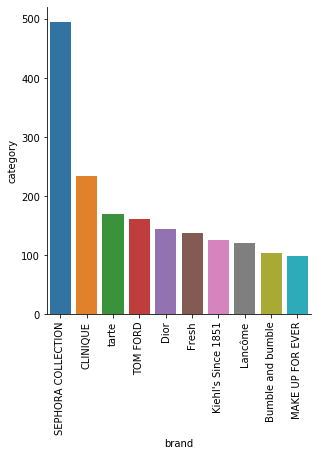

In [32]:
sns.catplot(x='brand', y='category', data=brandcat1, kind='bar')
plt.xticks(rotation=90)
plt.show()

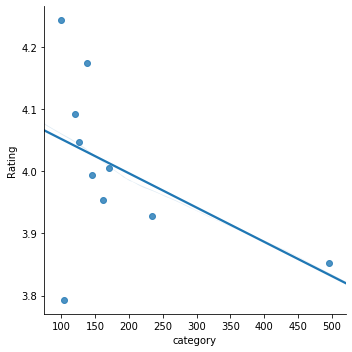

In [33]:
sns.lmplot(x="category", y="Rating",data=brandcat1, ci=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

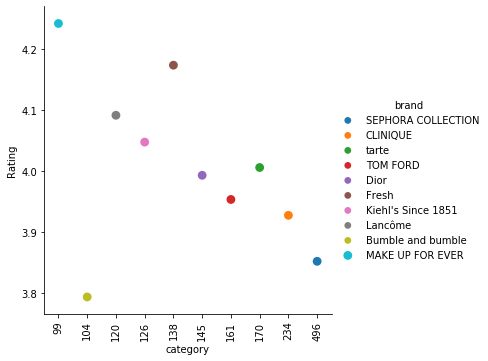

In [34]:
sns.catplot(x='category', y='Rating',hue='brand',data=brandcat1, kind='point')
plt.xticks(rotation=90)

In [35]:
brandcat1.corr()
#the stat shows that more category of a brand, the rating tends to be less. It could be hard to concentrate the quality control when there are too many produt lines.

,category,Rating
category,1.000000,-0.470949
Rating,-0.470949,1.000000


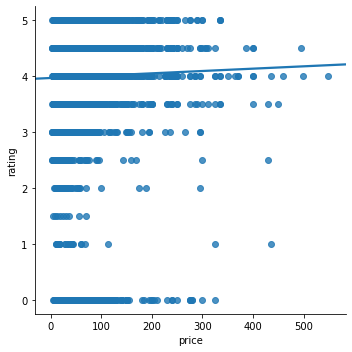

In [36]:
#price and quailty (assume rating is quality)
sns.lmplot(x="price", y="rating",data=df, ci=True)
#indication is there is not a clear relationship between the price and quality of the products. 

In [37]:
df.corr()

,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer,len
id,1.000000,-0.176684,-0.175482,-0.104208,-0.026661,-0.004168,0.283722,0.153745,0.199285,0.200357,-0.008607,0.182280
rating,-0.176684,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164,-0.008760
number_of_reviews,-0.175482,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742,0.003071
love,-0.104208,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879,0.028686
price,-0.026661,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679,-0.018420
value_price,-0.004168,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874,0.016384
MarketingFlags,0.283722,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908,0.084019
online_only,0.153745,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023,0.034937
exclusive,0.199285,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814,0.092220
limited_edition,0.200357,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129,0.105820


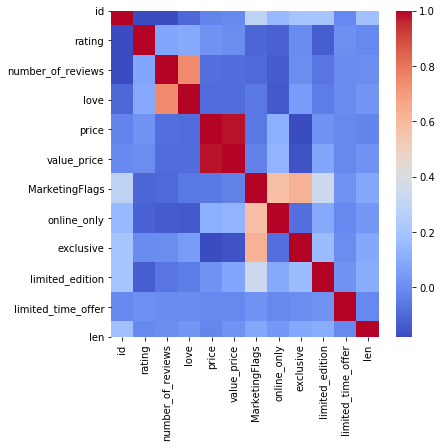

In [38]:
corr = df.corr()
_, ax = plt.subplots(figsize=(6,6))

#graph correlation matrix

_ = sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm')

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]), <a list of 9 Text xticklabel objects>)

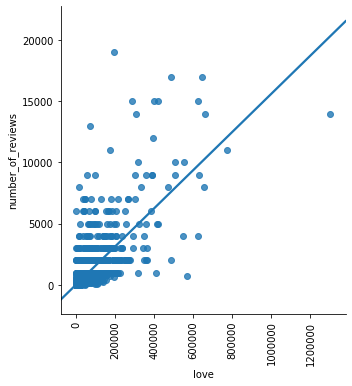

In [39]:
#Loves is a new way to collect and save all your favorite beauty items and products you can’t wait to try by clicking on the heart icons while you shop.
sns.lmplot(x="love", y="number_of_reviews",data=df, ci=True)
plt.xticks(rotation=90)
#The more people love the products, the higher tendency they are more likely to leave comments. But what does that mean?will that mean people would enjoy the products when there are more 'love'?

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]), <a list of 9 Text xticklabel objects>)

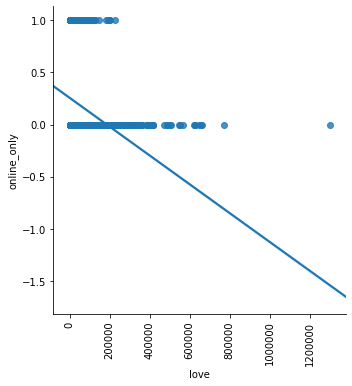

In [40]:
sns.lmplot(x="love", y='online_only',data=df, ci=True)
plt.xticks(rotation=90)
#with more love, clients tend to dislike online products. Could be the quality control on online products as clients could not try on the products. It might be time for sephora to reflect if theh AI is helping the virtual experience.

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]), <a list of 9 Text xticklabel objects>)

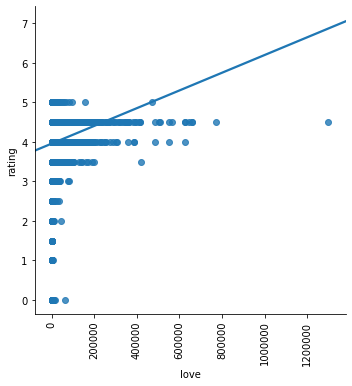

In [41]:
sns.lmplot(x="love", y="rating",data=df, ci=True)
plt.xticks(rotation=90)
#more love, tends to increase the rating.

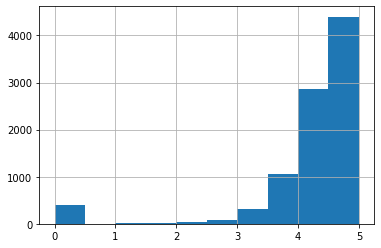

In [42]:
# explore relationship % love, rating, numbers of review
df['rating'].hist()

In [43]:
df['rating'].describe()

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [44]:
def rating_function(x):
    if x>=4:
        return 'high'
    else:
        return 'low'

In [45]:
df['rating_category'] = df['rating'].apply(rating_function)
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,len,rating_category
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,1625,high
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,7,high
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,440,high
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,7,high
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,1483,low


In [46]:
lowbrand = df[df['rating_category'] == 'low']

In [47]:
lowbrand = lowbrand.groupby('brand')[['rating_category']].count()

In [48]:
lowbrand.head()

,rating_category
brand,
8Greens,1
AERIN,2
ALTERNA Haircare,1
AMOREPACIFIC,6
Acqua Di Parma,12


In [49]:
lowbrand = lowbrand.sort_values('rating_category', ascending=False)[:10]

In [50]:
lowbrand.head()

,rating_category
brand,
SEPHORA COLLECTION,141
tarte,48
CLINIQUE,46
TOM FORD,39
Moroccanoil,37


In [51]:
lowbrand.reset_index(level=0, inplace=True)

In [52]:
lowbrand.head()

,brand,rating_category
0,SEPHORA COLLECTION,141
1,tarte,48
2,CLINIQUE,46
3,TOM FORD,39
4,Moroccanoil,37


In [53]:
lowbrand.columns = ['brand','low_rating_category']

In [54]:
lowbrand.head()

,brand,low_rating_category
0,SEPHORA COLLECTION,141
1,tarte,48
2,CLINIQUE,46
3,TOM FORD,39
4,Moroccanoil,37


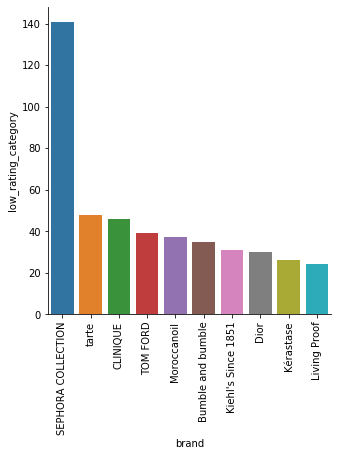

In [55]:
sns.catplot(x='brand', y='low_rating_category', data=lowbrand, kind='bar')
plt.xticks(rotation=90)
plt.show()

In [56]:
highbrand = df[df['rating_category'] == 'high']

In [57]:
highbrand = highbrand.groupby('brand')[['rating_category']].count()

In [58]:
highbrand

,rating_category
brand,
8Greens,2
AERIN,20
ALTERNA Haircare,41
AMOREPACIFIC,27
Acqua Di Parma,23
...,...
shu uemura,37
stila,7
surratt beauty,20


In [59]:
highbrand = highbrand.sort_values('rating_category', ascending=False)[:10]

In [60]:
highbrand.reset_index(level=0, inplace=True)

In [61]:
highbrand.head()

,brand,rating_category
0,SEPHORA COLLECTION,355
1,CLINIQUE,188
2,tarte,122
3,Fresh,122
4,TOM FORD,122


In [62]:
highbrand.columns = ['brand','high_rating_category']

In [63]:
highbrand.head()

,brand,high_rating_category
0,SEPHORA COLLECTION,355
1,CLINIQUE,188
2,tarte,122
3,Fresh,122
4,TOM FORD,122


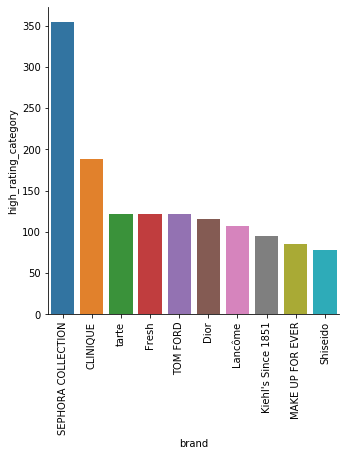

In [64]:
sns.catplot(x='brand', y='high_rating_category', data=highbrand, kind='bar')
plt.xticks(rotation=90)
plt.show()

In [65]:
#you need to do stacking barchart since brands have both high and low rating same time
## I find out the indexes are not the same so stacking barchart is not possible
#after this, you can compare rating high/low with love(popularity)



In [66]:
#pd.concat([brandhigh, brandcat2], axis=0, join='inner')

In [67]:
combine =pd.merge(highbrand, lowbrand, on=['brand'],how='outer')

In [68]:
combine

,brand,high_rating_category,low_rating_category
0,SEPHORA COLLECTION,355.0,141.0
1,CLINIQUE,188.0,46.0
2,tarte,122.0,48.0
3,Fresh,122.0,NaN
4,TOM FORD,122.0,39.0
5,Dior,115.0,30.0
6,Lancôme,107.0,NaN
7,Kiehl's Since 1851,95.0,31.0
8,MAKE UP FOR EVER,85.0,NaN
9,Shiseido,78.0,NaN


In [69]:
brandlist = combine.brand.tolist()

In [70]:
print(brandlist)

['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'Fresh', 'TOM FORD', 'Dior', 'Lancôme', "Kiehl's Since 1851", 'MAKE UP FOR EVER', 'Shiseido', 'Moroccanoil', 'Bumble and bumble', 'Kérastase', 'Living Proof']


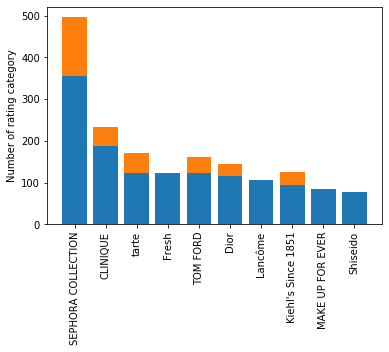

In [71]:
fig, ax = plt.subplots()
ax.bar(combine['brand'], combine["high_rating_category"])
ax.bar(combine['brand'], combine["low_rating_category"], bottom=combine["high_rating_category"])
plt.xticks(rotation=90)
ax.set_ylabel("Number of rating category")
plt.show() ## need to add legend
#the top three brands even have high rating but at the same time low rating also occupy a large portion especially sephora collection.

In [72]:
# I want to know the price comparison above bar chart and see if you can plot the line on top of the bar chart

In [73]:
#avgprice = df[df['rating_category'] == 'high'].groupby('brand')[['price']].mean()

In [74]:
highbrandprice = df.groupby('brand')[['rating_category','price']]

In [75]:
highbrandprice.head()

,rating_category,price
0,high,66.0
1,high,66.0
2,high,180.0
3,high,120.0
4,low,72.0
...,...,...
8951,high,79.0
8952,high,79.0
8965,high,14.0
8966,low,16.0


In [76]:
# slice df.loc[row_selection, column_selection]
df = pd.read_csv(filename, index_col ="brand") 
avgprice = df.loc[['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'Fresh', 'TOM FORD', 'Dior', 'Lancôme', "Kiehl's Since 1851", 'MAKE UP FOR EVER', 'Shiseido'],'price']

In [77]:
# reset series to dataframe
#description_counts = building_permits.type_desc.value_counts().reset_index()
avgprice = avgprice.reset_index()

In [78]:
type(avgprice)

pandas.core.frame.DataFrame

In [79]:
avgprice.columns = ['brand', 'avgprice']
avgprice.head()

,brand,avgprice
0,SEPHORA COLLECTION,8.0
1,SEPHORA COLLECTION,6.0
2,SEPHORA COLLECTION,13.0
3,SEPHORA COLLECTION,70.0
4,SEPHORA COLLECTION,20.0


In [80]:
type(avgprice)

pandas.core.frame.DataFrame

In [81]:
avgprice = avgprice.groupby('brand')['avgprice'].mean()

In [82]:
avgprice

brand
CLINIQUE               30.096154
Dior                   67.568966
Fresh                  48.637681
Kiehl's Since 1851     34.912698
Lancôme                48.416667
MAKE UP FOR EVER       31.101010
SEPHORA COLLECTION     18.342641
Shiseido               64.400000
TOM FORD              112.049689
tarte                  26.047059
Name: avgprice, dtype: float64

In [83]:
avgprice = avgprice.reset_index()

In [84]:
avgprice.columns = ['brand', 'avgprice']

In [85]:
avgprice

,brand,avgprice
0,CLINIQUE,30.096154
1,Dior,67.568966
2,Fresh,48.637681
3,Kiehl's Since 1851,34.912698
4,Lancôme,48.416667
5,MAKE UP FOR EVER,31.101010
6,SEPHORA COLLECTION,18.342641
7,Shiseido,64.400000
8,TOM FORD,112.049689
9,tarte,26.047059


In [86]:
list1 = ['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'Fresh', 'TOM FORD', 'Dior', 'Lancôme', "Kiehl's Since 1851", 'MAKE UP FOR EVER', 'Shiseido']

In [87]:
list2 = ['18.34','30.10','26.05','48.64','112.05','67.57','48.42','34.91','31.10','64.40']

In [88]:
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
avgprice = pd.DataFrame(list(zip(list1, list2)), 
               columns =['Brand', 'Avgprice']) 
avgprice

,Brand,Avgprice
0,SEPHORA COLLECTION,18.34
1,CLINIQUE,30.10
2,tarte,26.05
3,Fresh,48.64
4,TOM FORD,112.05
5,Dior,67.57
6,Lancôme,48.42
7,Kiehl's Since 1851,34.91
8,MAKE UP FOR EVER,31.10
9,Shiseido,64.40


In [90]:
combine

,brand,high_rating_category,low_rating_category
0,SEPHORA COLLECTION,355.0,141.0
1,CLINIQUE,188.0,46.0
2,tarte,122.0,48.0
3,Fresh,122.0,NaN
4,TOM FORD,122.0,39.0
5,Dior,115.0,30.0
6,Lancôme,107.0,NaN
7,Kiehl's Since 1851,95.0,31.0
8,MAKE UP FOR EVER,85.0,NaN
9,Shiseido,78.0,NaN


In [91]:
combine['avgprice'] = ['18.34','30.10','26.05','48.64','112.05','67.57','48.42','34.91','31.10','64.40','Nan','Nan','Nan','Nan']

In [92]:
combine = combine.loc[0:9]

In [93]:
combine["avgprice"] = pd.to_numeric(combine["avgprice"], downcast="float")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


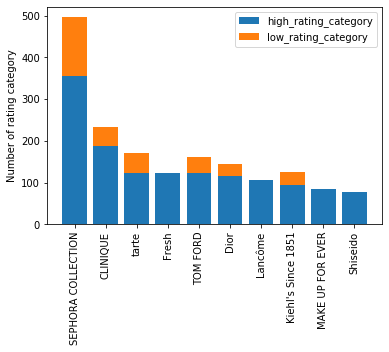

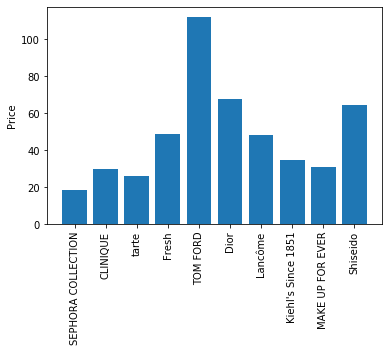

In [94]:
fig, ax= plt.subplots()
ax.bar(combine['brand'], combine["high_rating_category"], label ="high_rating_category")
ax.bar(combine['brand'], combine["low_rating_category"], bottom=combine["high_rating_category"], label ="low_rating_category")
ax.set_xticklabels(labels = combine['brand'])
plt.xticks(rotation=90)
ax.set_ylabel("Number of rating category")
ax.legend(loc=1)

fig, ax1=plt.subplots()
ax1.bar(combine['brand'],combine['avgprice'], label = 'Price')
plt.xticks(rotation=90)
ax1.set_ylabel("Price")
ax.legend(loc=1)